In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
crime_df=pd.read_csv("/content/CrimesOnWomenData.csv")

In [4]:
crime_df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [5]:
crime_df.tail()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0
735,735,Puducherry,2021,2,0,2,31,3,12,0


In [6]:
crime_df.describe()


,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [7]:
crime_df.isnull().sum()

,0
Unnamed: 0,0
State,0
Year,0
Rape,0
K&A,0
DD,0
AoW,0
AoM,0
DV,0
WT,0


In [8]:
crime_df.shape

(736, 10)

In [10]:
crime_columns = ['Rape','K&A','DD','AoW','AoM','DV','WT']
crime_df[crime_columns] = crime_df[crime_columns].apply(pd.to_numeric, errors='coerce')

crime_df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [9]:
# lets add all the crime(by creating a new col) to identify states with the highest crime against women

In [11]:
crime_df['Total_Crime'] = crime_df[crime_columns].sum(axis=1)
crime_df.head()


,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_Crime
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,13669
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0,180
2,2,ASSAM,2001,817,1070,59,850,4,1248,0,4048
3,3,BIHAR,2001,888,518,859,562,21,1558,83,4489
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0,3964


In [12]:
state_total = crime_df.groupby('State')['Total_Crime'].sum().sort_values(ascending=False)

top_states = state_total.head(10)
top_states




,Total_Crime
State,
Uttar Pradesh,350934
West Bengal,265807
Madhya Pradesh,262794
Rajasthan,243022
Maharashtra,232095
Assam,223410
Andhra Pradesh,200042
ANDHRA PRADESH,191081
UTTAR PRADESH,178800


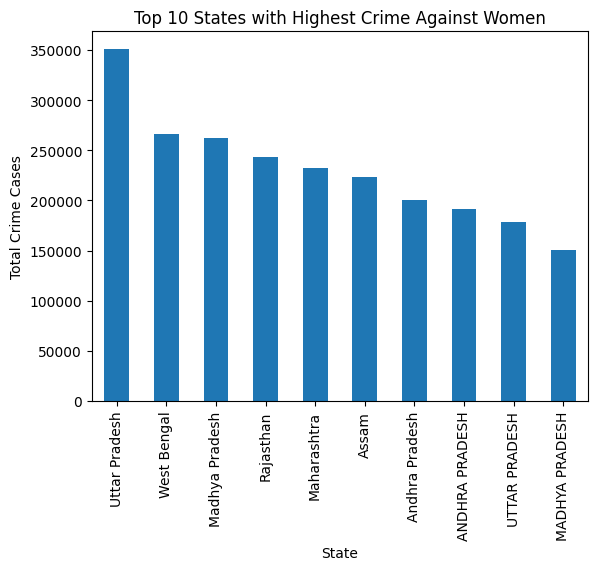

In [13]:
plt.figure()
top_states.plot(kind='bar')
plt.title("Top 10 States with Highest Crime Against Women")
plt.xlabel("State")
plt.ylabel("Total Crime Cases")
plt.show()


In [16]:
crime_by_state = crime_df.groupby('State')[crime_columns].sum()
crime_by_state.head()


,Rape,K&A,DD,AoW,AoM,DV,WT
State,,,,,,,
A & N ISLANDS,84,58,4,182,36,111,0
A & N Islands,340,305,9,376,99,254,10
ANDHRA PRADESH,10696,11921,5112,42334,28759,92242,17
ARUNACHAL PRADESH,412,440,1,666,16,123,0
ASSAM,12762,16368,1015,10587,99,27735,4


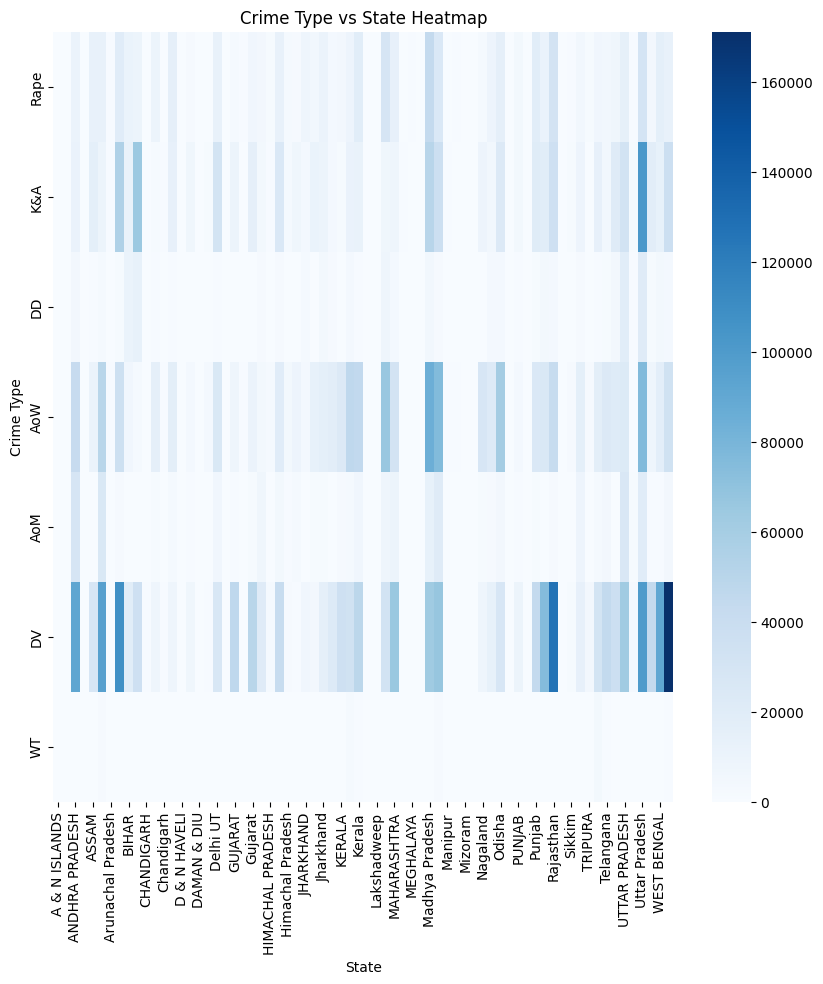

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_by_state.T, cmap="Blues")
plt.title("Crime Type vs State Heatmap")
plt.xlabel("State")
plt.ylabel("Crime Type")
plt.show()


In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_by_state)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

crime_by_state['Cluster'] = clusters
crime_by_state.head()


,Rape,K&A,DD,AoW,AoM,DV,WT,Cluster
State,,,,,,,,
A & N ISLANDS,84,58,4,182,36,111,0,0
A & N Islands,340,305,9,376,99,254,10,0
ANDHRA PRADESH,10696,11921,5112,42334,28759,92242,17,2
ARUNACHAL PRADESH,412,440,1,666,16,123,0,0
ASSAM,12762,16368,1015,10587,99,27735,4,0


Insights are important to an exploratory data analysis. The study into crimes against women found that many states in India experience different levels of crime against women, and some of these states report higher total crime counts than others (i.e., Uttar Pradesh, Maharashtra, and Rajasthan) because they have larger social and safety issues.

When you look at crime types across states, you will see there are states that have a large proportion of cases by crime type. For example, many states report a high number of dowry deaths, whereas some states report higher proportions of domestic violence or assault. This indicates that there are different patterns of crime that occur in various states, which may be due to cultural differences, economic differences, and differences in the way the government administers law and justice.

The clustering analysis from this study indicated that there are three different clusters based on states' crime intensity: high, medium, and low. In the high-crime cluster, states consistently reported high values across many categories of crime, whereas states in the low-crime cluster reported relatively low numbers of cases. The medium cluster had states that reported a mixture of high and low levels of crime.

It can be concluded from this analysis that developing state-specific strategies based on data would yield better results than trying to use a one-size-fits-all approach. Therefore, states should design their interventions related to the crimes against women based on the dominant crime type and geographical patterns established through data analysis.

Further if we want to train and make predictions we can import required Model such as Linear Regression,Random Forest to train this data.

Additional projects involving predictive models on similar datasets are available on my GitHub repository